In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [78]:
df = pd.read_csv('cses4_cut.csv')

In [79]:
df.head() #Unnecesary column detected 'Unnamed: 0'. Dropping it.

,Unnamed: 0,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,0,1,4,4,2,2,9,9,9,1,...,9,9,8300,121,8,999,999,4,31,True
1,1,2,3,1,2,2,9,9,9,8,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,2,1,2,2,9,9,9,7,...,5,9,1101,121,2,999,999,4,67,True
3,4,2,4,4,2,2,9,9,9,5,...,9,9,8300,121,2,999,999,4,26,False
4,5,1,6,4,1,1,9,9,9,1,...,1,9,1101,121,2,999,999,4,55,True


In [80]:
df = df.drop(columns = ['Unnamed: 0'])

In [81]:
# D2029 , D2030 looks like the columns contain the same values. If so, we could drop them because they don't add variablity to our model.
df

,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,2,2,9,9,9,1,422,...,9,9,8300,121,8,999,999,4,31,True
1,2,3,1,2,2,9,9,9,8,999,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,1,2,2,9,9,9,7,818,...,5,9,1101,121,2,999,999,4,67,True
3,2,4,4,2,2,9,9,9,5,513,...,9,9,8300,121,2,999,999,4,26,False
4,1,6,4,1,1,9,9,9,1,235,...,1,9,1101,121,2,999,999,4,55,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,2,4,1,2,2,9,9,9,1,999,...,1,9,1211,999,55,1,999,9,62,True
12447,1,3,1,2,2,9,9,9,9,999,...,1,9,8300,999,17,1,999,9,65,True
12448,2,6,2,2,2,9,9,9,1,999,...,4,9,1211,999,19,1,999,9,61,True
12449,2,7,1,2,1,9,9,9,1,999,...,6,9,1210,999,25,1,999,9,53,True


In [82]:
#The code below shows the unique values in the representing the features, 
#with using these we will be able to discover features and detect anomalies.

for column in df:
    print('Unique values in the', column, 'feature')
    print(df[column].value_counts())
    print()

Unique values in the D2002 feature
2    6623
1    5828
Name: D2002, dtype: int64

Unique values in the D2003 feature
4     4297
2     2184
3     2160
7     1214
1      766
5      572
6      565
8      436
96     168
9       49
97      20
99      18
98       2
Name: D2003, dtype: int64

Unique values in the D2004 feature
1    7607
4    2592
3     857
9     738
2     621
7      27
8       9
Name: D2004, dtype: int64

Unique values in the D2005 feature
2    10472
9     1108
1      789
8       54
7       28
Name: D2005, dtype: int64

Unique values in the D2006 feature
2    9552
9    2206
1     564
8      90
7      39
Name: D2006, dtype: int64

Unique values in the D2007 feature
9    7086
2    5211
1      93
8      42
7      19
Name: D2007, dtype: int64

Unique values in the D2008 feature
9    7087
2    5192
1     113
8      41
7      18
Name: D2008, dtype: int64

Unique values in the D2009 feature
9    7086
2    5145
1     159
8      43
7      18
Name: D2009, dtype: int64

Unique values in

In [83]:
#After looking at the unique values, I have determined which features to encode in onehot format(onehot_list) and keep others in label encoding.
#Also, I have found some illogical values, for household features(2021, 2022, 2023) there are values like 97,98. I will change them to NA values.

df['D2021'] = df['D2021'].apply(lambda x: np.nan if x >20 else x)
df['D2022'] = df['D2022'].apply(lambda x: np.nan if x >18 else x)
df['D2023'] = df['D2023'].apply(lambda x: np.nan if x >19 else x)

#I have found some features looking not 'very usable'. However, we will implement all the features to ML and my strategy for ML: 
#    1. Keep all fetures at first. Encode them and use them in ML.
#    2. Find how they contribute, remove them if they don't contribute to ML. Or mix them in PCA. 
#    3. Implement different models, try to create best model.

one_hot_list = ['D2002', 'D2003', 'D2004', 'D2010', 'D2011', 'D2012', 'D2013', 'D2014', 'D2015', 
               'D2016', 'D2017', 'D2018', 'D2019', 'D2025', 'D2026', 'D2027', 'D2028', 
               'D2029', 'D2030', 'D2031']

#Encoding strategy:
#I have kept membership values as label encoding because they represent a value not category.
#Household income higher is good, lower is worse. That's why I kept it label encoded.
#D2021, D2022, D2023 represents number in household so they are not categorical features. I will keep them as they are.
#D2024, religous servicees attendence is also a number. So label encoding.


In [84]:
#As we transformed some values to Null, I will convert them median value 
#because Null values may create problem with standardizing and ML algorithms.
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df[['D2021', 'D2022', 'D2023']]= imp_median.fit_transform(df[['D2021', 'D2022', 'D2023']]) 

In [85]:
#Change voted feature. True to 1 and False to 0. 
df['voted'] = df['voted'].apply(lambda x: 1 if x is True else 0)

In [86]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D2002   12451 non-null  int64  
 1   D2003   12451 non-null  int64  
 2   D2004   12451 non-null  int64  
 3   D2005   12451 non-null  int64  
 4   D2006   12451 non-null  int64  
 5   D2007   12451 non-null  int64  
 6   D2008   12451 non-null  int64  
 7   D2009   12451 non-null  int64  
 8   D2010   12451 non-null  int64  
 9   D2011   12451 non-null  int64  
 10  D2012   12451 non-null  int64  
 11  D2013   12451 non-null  int64  
 12  D2014   12451 non-null  int64  
 13  D2015   12451 non-null  int64  
 14  D2016   12451 non-null  int64  
 15  D2017   12451 non-null  int64  
 16  D2018   12451 non-null  int64  
 17  D2019   12451 non-null  int64  
 18  D2020   12451 non-null  int64  
 19  D2021   12451 non-null  float64
 20  D2022   12451 non-null  float64
 21  D2023   12451 non-null  float64
 22

In [88]:
new_df = pd.get_dummies(df, prefix=one_hot_list, columns=one_hot_list)

In [89]:
df

,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,2,2,9,9,9,1,422,...,9,9,8300,121,8,999,999,4,31,1
1,2,3,1,2,2,9,9,9,8,999,...,6,9,1101,121,12,999,999,4,42,1
2,2,2,1,2,2,9,9,9,7,818,...,5,9,1101,121,2,999,999,4,67,1
3,2,4,4,2,2,9,9,9,5,513,...,9,9,8300,121,2,999,999,4,26,0
4,1,6,4,1,1,9,9,9,1,235,...,1,9,1101,121,2,999,999,4,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,2,4,1,2,2,9,9,9,1,999,...,1,9,1211,999,55,1,999,9,62,1
12447,1,3,1,2,2,9,9,9,9,999,...,1,9,8300,999,17,1,999,9,65,1
12448,2,6,2,2,2,9,9,9,1,999,...,4,9,1211,999,19,1,999,9,61,1
12449,2,7,1,2,1,9,9,9,1,999,...,6,9,1210,999,25,1,999,9,53,1


In [90]:
new_df

,D2005,D2006,D2007,D2008,D2009,D2020,D2021,D2022,D2023,D2024,...,D2030_4,D2030_996,D2030_997,D2030_998,D2030_999,D2031_1,D2031_2,D2031_3,D2031_4,D2031_9
0,2,2,9,9,9,3,3.0,0.0,0.0,9,...,0,0,0,0,1,0,0,0,1,0
1,2,2,9,9,9,1,5.0,3.0,0.0,6,...,0,0,0,0,1,0,0,0,1,0
2,2,2,9,9,9,9,3.0,0.0,0.0,5,...,0,0,0,0,1,0,0,0,1,0
3,2,2,9,9,9,9,7.0,2.0,0.0,9,...,0,0,0,0,1,0,0,0,1,0
4,1,1,9,9,9,5,2.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,2,2,9,9,9,2,3.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
12447,2,2,9,9,9,1,3.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
12448,2,2,9,9,9,3,3.0,2.0,0.0,4,...,0,0,0,0,1,0,0,0,0,1
12449,2,1,9,9,9,4,3.0,2.0,0.0,6,...,0,0,0,0,1,0,0,0,0,1


In [91]:
y = new_df['voted']
X= new_df.drop(columns = ['voted'])

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1=sc.fit_transform(X_train)
X_train1[:]
X_test1 = sc.fit_transform(X_test)
X_test1[:]

array([[-0.29295807, -0.46869131, -1.15704192, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-0.29295807, -0.46869131, -1.15704192, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-0.29295807, -0.46869131, -1.15704192, ..., -0.1530302 ,
        -0.66010217,  1.25221453],
       ...,
       [-0.29295807, -0.46869131,  0.8623095 , ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-0.29295807, -0.46869131, -1.15704192, ..., -0.1530302 ,
         1.51491701, -0.79858521],
       [-0.76744347, -0.46869131,  0.8623095 , ..., -0.1530302 ,
        -0.66010217,  1.25221453]])

In [95]:
norm = StandardScaler().fit(X)

# transform training data
X_train_norm = norm.transform(X_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

Scaled Train Data: 


[[-0.28848428 -0.4580945  -1.15494116 ... -0.16628105 -0.64661375
   1.25782495]
 [-0.28848428  2.09914256  0.8640978  ... -0.16628105  1.54651831
  -0.79502319]
 [-0.28848428 -0.4580945   0.8640978  ... -0.16628105 -0.64661375
  -0.79502319]
 ...
 [-0.28848428 -0.4580945  -1.15494116 ... -0.16628105 -0.64661375
  -0.79502319]
 [-0.28848428 -0.4580945   0.8640978  ... -0.16628105 -0.64661375
   1.25782495]
 [-0.28848428 -0.4580945  -1.15494116 ... -0.16628105 -0.64661375
   1.25782495]]


## ML Implementation

In [97]:
#My strategy with ML:
#    1.Apply ML without application first. Get the base result for comprasion
#    2.After every action (Standardization, PCA, ML tuning etc.), get the score to compare if the application is worthy.
#    3.Evaluate all results in the end. Find the best implementation and use it.

#ML algortihms: 
#    1.Random Forest Classifier, Logistic Regression, Gradient Boosting Classifier

#Metrics
#I will use AUC instead of Accuracy or other metrics. It is easy to compare and hence voted feature is imbalanced. 
#It is much better to use AUC.

In [213]:
#Import necessary libraries and metrics
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [214]:
df['voted'].value_counts()

1    10226
0     2225
Name: voted, dtype: int64

In [240]:
def random_forest(X, y, ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    rfc = RandomForestClassifier(n_estimators=500)
    rfc.fit(X_train,y_train)
    predictions = rfc.predict(X_test)
    
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
    print ("AUC Score : %f" % roc_auc_score(y_test, predictions))
    
    #Print Feature Importance:
    #As there are lots of features its important to get only some of them. You can change feat_imp[:20]
    def plot_feature_importance(importance,names,model_type, top_x_features):

        #Create arrays from feature importance and feature names
        feature_importance = np.array(importance)
        feature_names = np.array(names)
        
        feature_names = feature_names[:top_x_features]
        print(feature_names)
        feature_importance = feature_importance[:top_x_features]
        #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot
        plt.figure(figsize=(10,8))
        #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')
    plot_feature_importance(rfc.feature_importances_, X.columns, 'Random Forest ', 20)

In [241]:
def gbc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    gbc_ = GradientBoostingClassifier()
    gbc_.fit(X_train,y_train)
    predictions = gbc_.predict(X_test)
    
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
    print ("AUC Score : %f" % roc_auc_score(y_test, predictions))
    
    #Print Feature Importance:
    #As there are lots of features its important to get only some of them. You can change feat_imp[:20]
    def plot_feature_importance(importance,names,model_type, top_x_features):

        #Create arrays from feature importance and feature names
        feature_importance = np.array(importance)
        feature_names = np.array(names)
        
        feature_names = feature_names[:top_x_features]
        print(feature_names)
        feature_importance = feature_importance[:top_x_features]
        #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot
        plt.figure(figsize=(10,8))
        #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')
#     printFeatureImportance()
    plot_feature_importance(gbc_.feature_importances_, X.columns, 'Gradient Boosting Classifier ', 20)
    


In [242]:
def log_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    log_reg_ = LogisticRegression(max_iter = 100000)
    log_reg_.fit(X_train,y_train)
    predictions = log_reg_.predict(X_test)
    
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
    print ("AUC Score : %f" % roc_auc_score(y_test, predictions))
    

In [243]:
def SVC_(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    svm = SVC()
    svm.fit(X_train,y_train)
    predictions = svm.predict(X_test)
    print(roc_auc_score(y_test, predictions))
    
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
    print ("AUC Score : %f" % roc_auc_score(y_test, predictions))

## Base Implementation 

In [244]:
SVC_(X,y)

0.58153775968557

Model Report
Accuracy : 0.8587
AUC Score : 0.581538



Model Report
Accuracy : 0.8699
AUC Score : 0.641957
['D2005' 'D2006' 'D2007' 'D2008' 'D2009' 'D2020' 'D2021' 'D2022' 'D2023'
 'D2024' 'age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7']


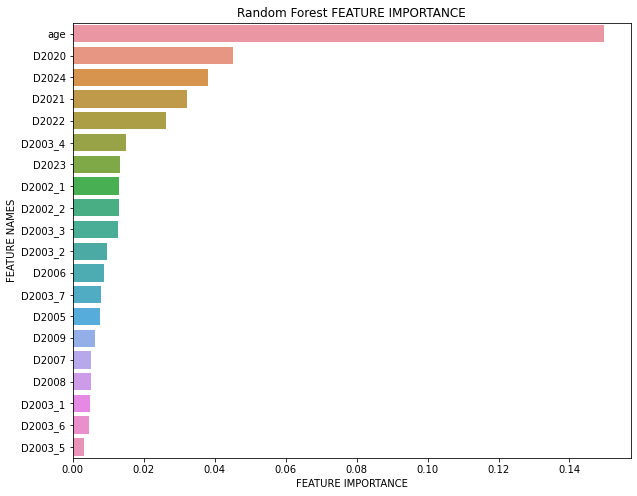

In [245]:
random_forest(X,y)


Model Report
Accuracy : 0.8631
AUC Score : 0.669108
['D2005' 'D2006' 'D2007' 'D2008' 'D2009' 'D2020' 'D2021' 'D2022' 'D2023'
 'D2024' 'age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7']


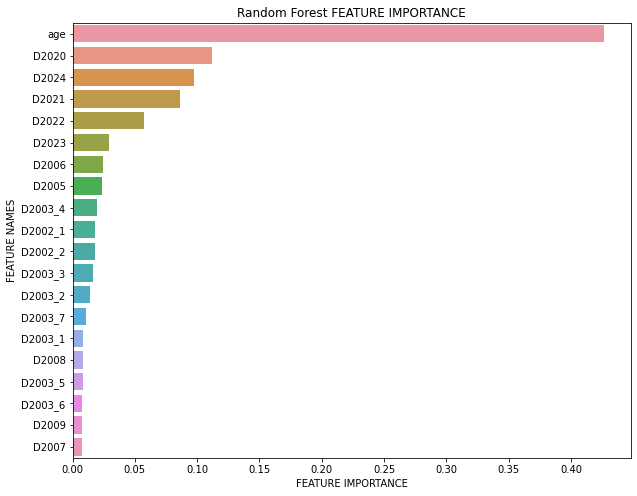

In [246]:
random_forest(X[['D2005', 'D2006', 'D2007', 'D2008', 'D2009', 'D2020', 'D2021', 'D2022', 'D2023',
 'D2024', 'age', 'D2002_1', 'D2002_2' ,'D2003_1', 'D2003_2', 'D2003_3', 'D2003_4',
 'D2003_5', 'D2003_6', 'D2003_7']],y)


Model Report
Accuracy : 0.8655
AUC Score : 0.671526
['D2005' 'D2006' 'D2020' 'D2021' 'D2022' 'D2023' 'D2024' 'age' 'D2002_1'
 'D2002_2' 'D2003_4' 'D2003_7']


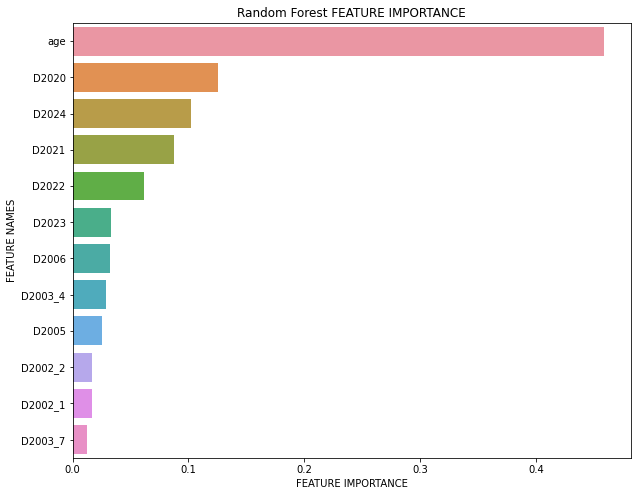

In [247]:
random_forest(X[['D2005', 'D2006',    'D2020', 'D2021', 'D2022', 'D2023',
 'D2024', 'age', 'D2002_1', 'D2002_2' ,   'D2003_4',
  'D2003_7']],y)


Model Report
Accuracy : 0.8776
AUC Score : 0.664096
['D2005' 'D2006' 'D2007' 'D2008' 'D2009' 'D2020' 'D2021' 'D2022' 'D2023'
 'D2024' 'age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7']


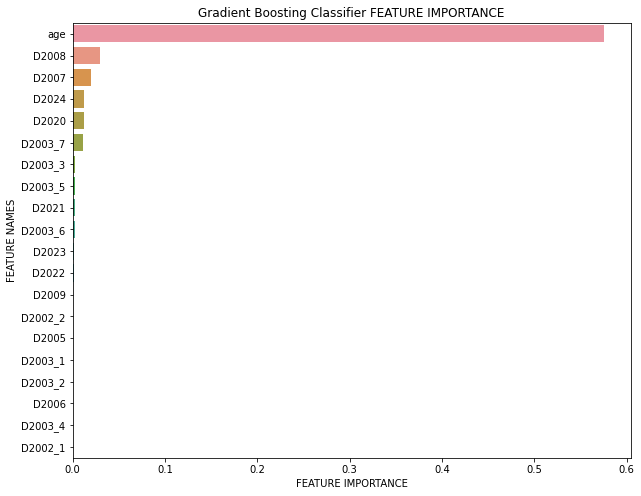

In [248]:
gbc(X,y)


Model Report
Accuracy : 0.8671
AUC Score : 0.639298
['D2007' 'D2008' 'D2009' 'D2020' 'D2024' 'age' 'D2003_7']


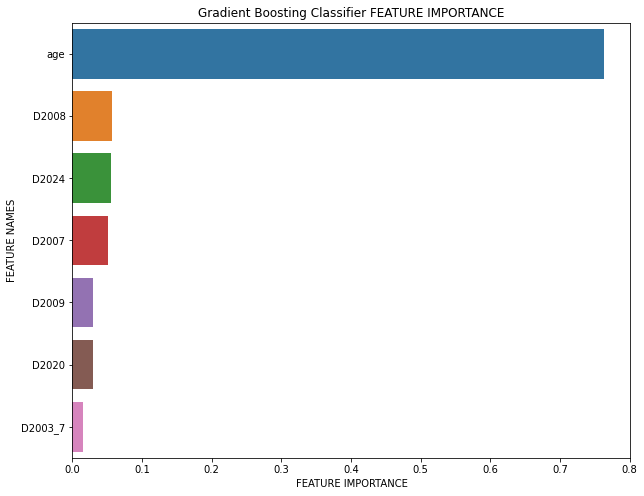

In [249]:
gbc(X[['D2007', 'D2008', 'D2009', 'D2020', 
 'D2024', 'age', 'D2003_7']], y)

In [250]:
log_reg(X,y)


Model Report
Accuracy : 0.8583
AUC Score : 0.631082


## Standardizing

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = X.copy()
col_names = X.columns
features = X[col_names]

df_scaled[col_names] = scaler.fit_transform(features.values)

In [252]:
SVC_(df_scaled,y)

0.5701665730862812

Model Report
Accuracy : 0.8479
AUC Score : 0.570167



Model Report
Accuracy : 0.8711
AUC Score : 0.641702
['D2005' 'D2006' 'D2007' 'D2008' 'D2009' 'D2020' 'D2021' 'D2022' 'D2023'
 'D2024' 'age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7']


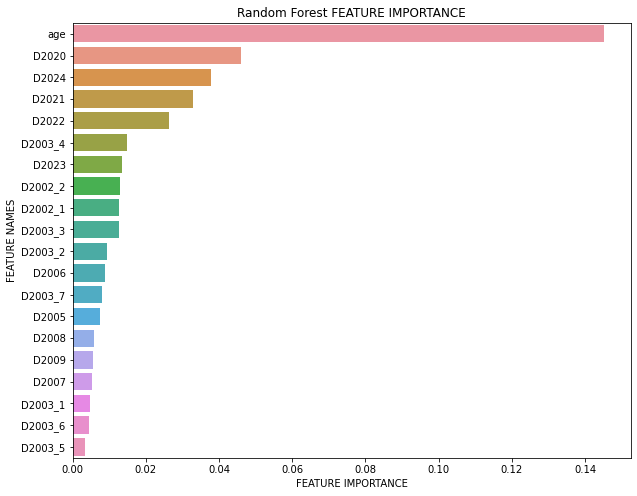

In [253]:
random_forest(df_scaled,y)


Model Report
Accuracy : 0.8631
AUC Score : 0.669108
['D2005' 'D2006' 'D2020' 'D2021' 'D2022' 'D2023' 'D2024' 'age' 'D2002_1'
 'D2002_2' 'D2003_4' 'D2003_7']


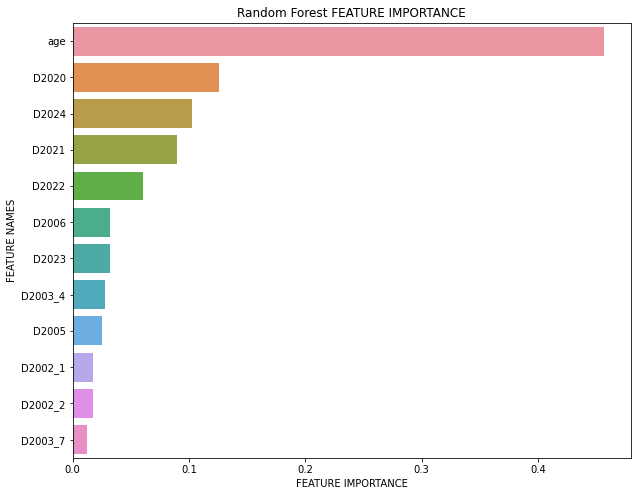

In [254]:
random_forest(df_scaled[['D2005', 'D2006',    'D2020', 'D2021', 'D2022', 'D2023',
 'D2024', 'age', 'D2002_1', 'D2002_2' ,   'D2003_4',
  'D2003_7']],y)


Model Report
Accuracy : 0.8772
AUC Score : 0.663855
['D2005' 'D2006' 'D2007' 'D2008' 'D2009' 'D2020' 'D2021' 'D2022' 'D2023'
 'D2024' 'age' 'D2002_1' 'D2002_2' 'D2003_1' 'D2003_2' 'D2003_3' 'D2003_4'
 'D2003_5' 'D2003_6' 'D2003_7']


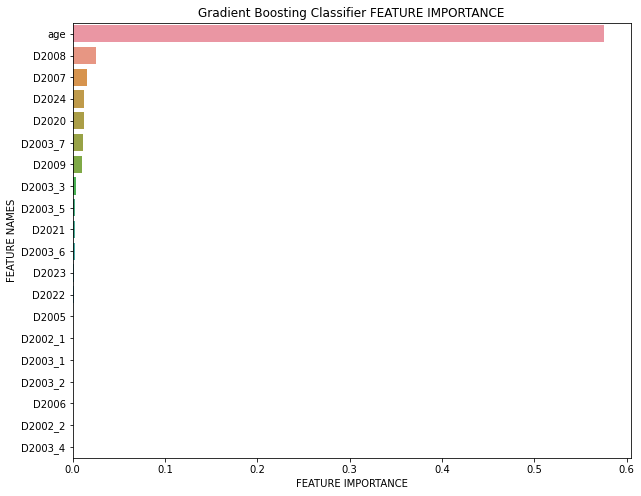

In [255]:
gbc(df_scaled,y)


Model Report
Accuracy : 0.8671
AUC Score : 0.639298
['D2007' 'D2008' 'D2009' 'D2020' 'D2024' 'age' 'D2003_7']


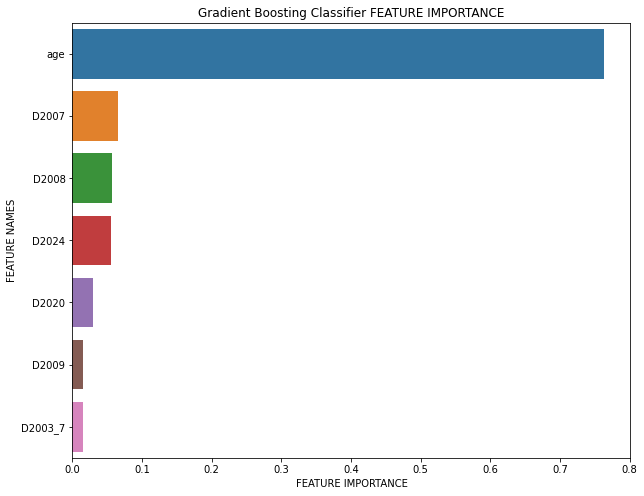

In [256]:
gbc(df_scaled[['D2007', 'D2008', 'D2009', 'D2020', 
 'D2024', 'age', 'D2003_7']], y)

In [257]:
log_reg(df_scaled,y)


Model Report
Accuracy : 0.8539
AUC Score : 0.632342


## Base Model with KBest features

In [258]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

        Specs        Score
10        age  4588.480589
29    D2004_4   567.917685
38    D2010_6   488.186054
4       D2009   303.929085
2       D2007   302.463042
3       D2008   301.992033
200   D2014_9   225.182953
193   D2013_9   199.215725
369   D2025_9   181.930183
1       D2006   155.618389
26    D2004_1   142.863226
493  D2028_48   122.235564
196   D2014_3   120.832173
421  D2027_36   120.241863
358   D2019_3   114.218137


In [259]:
new_columns= np.array(featureScores.nlargest(15,'Score')['Specs'])

In [260]:
SVC_(X[new_columns],y)

0.5518452882275875

Model Report
Accuracy : 0.8499
AUC Score : 0.551845


In [261]:
SVC_(df_scaled[new_columns],y)

0.5960128906981097

Model Report
Accuracy : 0.8503
AUC Score : 0.596013



Model Report
Accuracy : 0.8487
AUC Score : 0.658502
['age' 'D2004_4' 'D2010_6' 'D2009' 'D2007' 'D2008' 'D2014_9' 'D2013_9'
 'D2025_9' 'D2006' 'D2004_1' 'D2028_48' 'D2014_3' 'D2027_36' 'D2019_3']


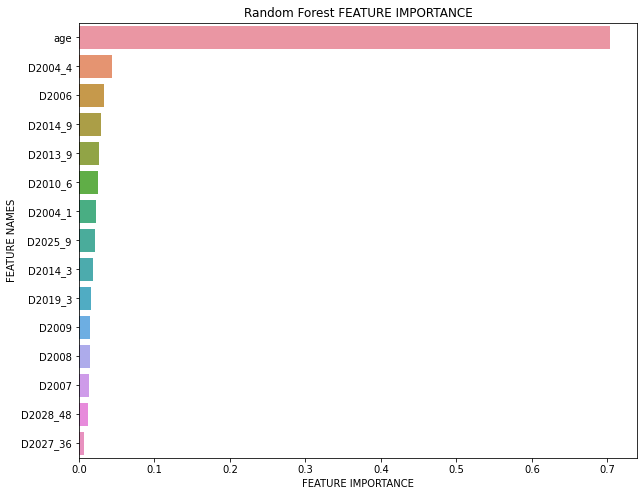

In [262]:
random_forest(X[new_columns],y)


Model Report
Accuracy : 0.8703
AUC Score : 0.643174
['age' 'D2004_4' 'D2010_6' 'D2009' 'D2007' 'D2008' 'D2014_9' 'D2013_9'
 'D2025_9' 'D2006' 'D2004_1' 'D2028_48' 'D2014_3' 'D2027_36' 'D2019_3']


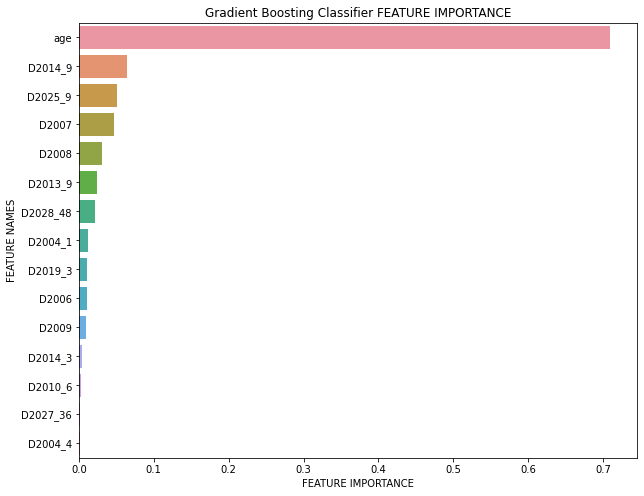

In [263]:
gbc(X[new_columns],y)

In [358]:
log_reg(df_scaled[new_columns],y)


Model Report
Accuracy : 0.8571
AUC Score : 0.598147


In [359]:
log_reg(X[new_columns],y)


Model Report
Accuracy : 0.8567
AUC Score : 0.596931


## PCA

In [270]:
from sklearn.decomposition import PCA

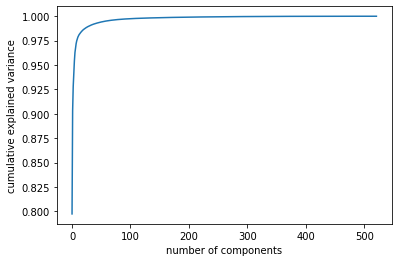

In [272]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [280]:
#In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(df_scaled)
print(pca.components_)
print(pca.explained_variance_)


[[-1.40295708e-02 -3.04814447e-02  1.60656945e-02 ...  9.25428960e-04
  -3.46115981e-03 -6.59614182e-04]
 [-1.20088488e-01 -2.23398717e-01 -5.54471249e-01 ... -2.96185276e-04
  -1.09288523e-02  2.55276509e-02]]
[288.7485887   38.26904243]


Text(0, 0.5, 'Second Principal Component')

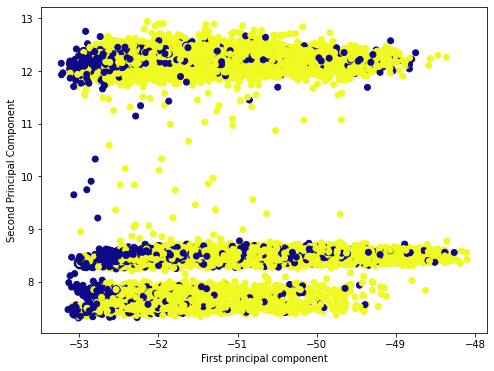

In [287]:
#Not good discrimination is available.
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [288]:
# I will pass PCA and don't implement it because the algorithms won't perform better 
# as it can be seen in the figure abovethere is not nice seperation between voted class 1 and 0.

## Tuning for RandomForest and Gradient Boosting

In [266]:
## I will do parameter tuning for RandomForest
## RF performed better than all other algortihms.

In [336]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest, I choose low because otherwise takes lot of time.
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}


In [335]:
#With these features, it performed best. That's why we will implement grid search on this data.
new_X = X[['D2005', 'D2006',    'D2020', 'D2021', 'D2022', 'D2023',
 'D2024', 'age', 'D2002_1', 'D2002_2' ,   'D2003_4',
  'D2003_7']]
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, random_state = 0)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'roc_auc')
# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [338]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [339]:
rfc = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_depth= 10)

rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
        
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
print ("AUC Score : %f" % roc_auc_score(y_test, predictions))


Model Report
Accuracy : 0.8723
AUC Score : 0.647304


In [340]:
#Optimizing after RandomSearch
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110,120],
    'max_features': ['auto'],
    'min_samples_leaf': [3,4,5,6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'roc_auc')

In [341]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   56.9s finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 300}

In [355]:
#Optimizing again.
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [120,130, 140,160],
    'max_features': ['auto'],
    'min_samples_leaf': [8,9,10],
    'min_samples_split': [10],
    'n_estimators': [300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [356]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   15.9s finished


{'bootstrap': True,
 'max_depth': 120,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 300}

In [357]:
rfc = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 10,
 max_depth= 120)

rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
        
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, predictions))
print ("AUC Score : %f" % roc_auc_score(y_test, predictions))


Model Report
Accuracy : 0.8719
AUC Score : 0.645112


In [ ]:
#I tried to optimize it but base model performed better in terms of auc.
#In terms of accuracy there is a slight improvement after optimizing, it has increased to 0.8752 from 0.8655.
#Depending on business objective , we could choose the best option